In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [4]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [5]:
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [6]:
for stock_df , allo in zip((aapl, cisco, ibm, amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [7]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [8]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [9]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [10]:
all_pos_values = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_values, axis=1)

In [11]:
portfolio_val.columns = ['AAPL', 'CSCO', 'IBM', 'AMZN']

In [12]:
portfolio_val['Total'] = portfolio_val.sum(axis=1)

In [13]:
portfolio_val.head()

,AAPL,CSCO,IBM,AMZN,Total
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

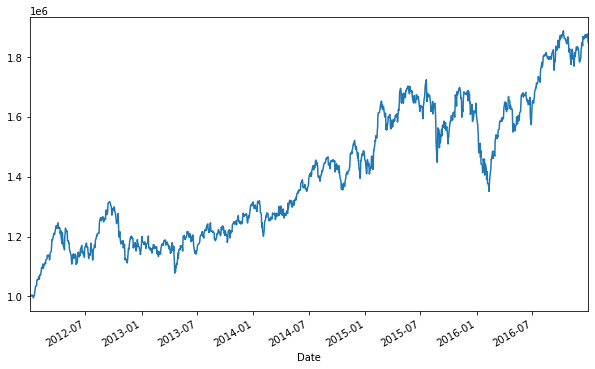

In [15]:
portfolio_val['Total'].plot(figsize=(10,6))

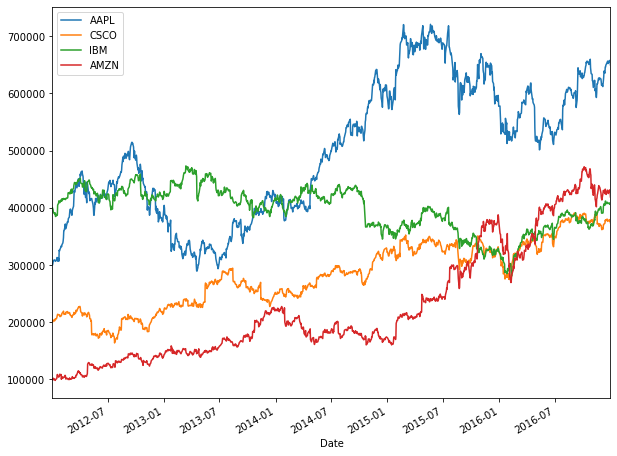

In [16]:
portfolio_val.drop('Total', axis=1).plot(figsize=(10,8))

In [17]:
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [18]:
portfolio_val.head()

,AAPL,CSCO,IBM,AMZN,Total,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [19]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [20]:
portfolio_val['Daily Return'].std()

0.010568287769161725

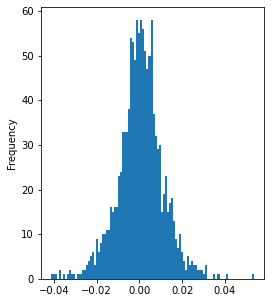

In [21]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(4, 5))

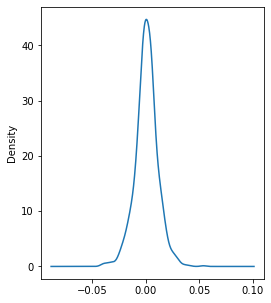

In [22]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4, 5))

In [23]:
cumulative_return = 100*(portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)

In [24]:
cumulative_return

84.74285181665545

In [26]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [27]:
SR

0.05149680662648089

In [28]:
SR*(252**0.5)

0.817486461885909